In [90]:
import numpy as np

In [100]:
class SGD:
    def __init__(self, X, y, alpha=0.01, epochs=100, batch_size=16):
        self.X = np.concatenate((np.ones((np.shape(X)[0], 1)), X), axis=1)
        self.y = y
        self.alpha = alpha
        self.epochs = epochs
        self.batch_size = batch_size
        self.W = np.random.randn(np.shape(X)[1] + 1, )

    @staticmethod
    def get_gradient(X_batch, error):
        gradient = 1 / len(X_batch) * X_batch.T.dot(error)
        return gradient

    @staticmethod
    def get_error(X_batch, y_batch, W):
        y_estimated = X_batch @ W
        error = y_estimated - y_batch
        return error

    @staticmethod
    def get_mse(X_batch, error):
        return 1 / 2 * len(X_batch) * np.sum(error ** 2)

    def _batch_generator(self) -> tuple:
        for i in range(0, len(self.X), self.batch_size):
            X_batch = self.X[i:(i + self.batch_size)] 
            y_batch = self.y[i:(i + self.batch_size)]
            yield X_batch, y_batch

    def run(self):
        general_loss_list = []
        for epoch in range(self.epochs):
            batch_loss_list = []
            for X_batch, y_batch  in self._batch_generator():
                error = self.get_error(X_batch, y_batch, self.W)
                mse = self.get_mse(X_batch, error)
                batch_loss_list.append(mse)
                gradient = self.get_gradient(X_batch, error)
                self.W = self.W - self.alpha * gradient
            general_loss_list.append(np.mean(batch_loss_list))
        return self.W, general_loss_list

In [120]:
np.random.seed(42)
X = 5 * np.random.rand(1000, 5)
y = 4 + X @ np.random.rand(5, 1)
y = np.ndarray.flatten(y)

In [133]:
stochastic_gradient_descent = SGD(X, y, epochs=50)
weight_matrix, mse_dynamics = stochastic_gradient_descent.run()

In [134]:
import seaborn as sns

<Axes: >

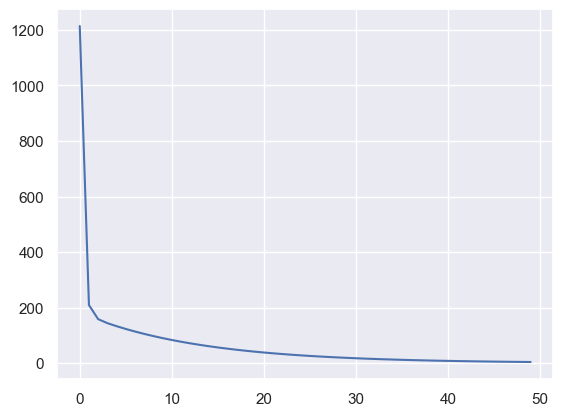

In [135]:
sns.set()
sns.lineplot(mse_dynamics)